dataset used: https://www.kaggle.com/datasets/belkhirnacim/textiledefectdetection

train

In [ ]:
import h5py

def check_h5_structure(file_path):
    """Checks if an HDF5 file contains images separated into different groups (folders)."""
    def recursive_check(name, obj):
        indent = '  ' * name.count('/')
        if isinstance(obj, h5py.Group):
            print(f"{indent}[Group] {name}")  # Acts like a folder
        elif isinstance(obj, h5py.Dataset):
            print(f"{indent}[Dataset] {name} - Shape: {obj.shape}, Type: {obj.dtype}")

    try:
        with h5py.File(file_path, 'r') as h5_file:
            print(f"Checking structure of: {file_path}\n")
            h5_file.visititems(recursive_check)
    except Exception as e:
        print("Error reading HDF5 file:", e)

if __name__ == "__main__":
    file_path = "/content/matchingtDATASET_train_64.h5"  # Change to your HDF5 file path
    check_h5_structure(file_path)


Checking structure of: /content/matchingtDATASET_train_64.h5

[Group] color
  [Dataset] color/angle0 - Shape: (1500, 1, 64, 64), Type: float32
  [Dataset] color/angle100 - Shape: (1500, 1, 64, 64), Type: float32
  [Dataset] color/angle120 - Shape: (1500, 1, 64, 64), Type: float32
  [Dataset] color/angle140 - Shape: (1500, 1, 64, 64), Type: float32
  [Dataset] color/angle20 - Shape: (1500, 1, 64, 64), Type: float32
  [Dataset] color/angle40 - Shape: (1500, 1, 64, 64), Type: float32
  [Dataset] color/angle60 - Shape: (1500, 1, 64, 64), Type: float32
  [Dataset] color/angle80 - Shape: (1500, 1, 64, 64), Type: float32
[Group] cut
  [Dataset] cut/angle0 - Shape: (1500, 1, 64, 64), Type: float32
  [Dataset] cut/angle100 - Shape: (1500, 1, 64, 64), Type: float32
  [Dataset] cut/angle120 - Shape: (1500, 1, 64, 64), Type: float32
  [Dataset] cut/angle140 - Shape: (1500, 1, 64, 64), Type: float32
  [Dataset] cut/angle20 - Shape: (1500, 1, 64, 64), Type: float32
  [Dataset] cut/angle40 - Shape: (

In [ ]:
import h5py
import numpy as np
import os
from PIL import Image

def save_images_from_h5(file_path, output_folder):
    """Extracts and saves images from an HDF5 (.h5) file into a folder while maintaining the folder hierarchy."""
    try:
        with h5py.File(file_path, 'r') as h5_file:
            print("Keys in the file:", list(h5_file.keys()))

            for group_name in h5_file.keys():
                group = h5_file[group_name]
                group_folder = os.path.join(output_folder, group_name)
                os.makedirs(group_folder, exist_ok=True)

                for key in group.keys():
                    data = group[key]
                    print(f"\nProcessing Dataset: {group_name}/{key}")
                    print("Shape:", data.shape)
                    print("Data Type:", data.dtype)

                    if len(data.shape) == 4 and data.shape[1] == 1:  # Fix for (batch, 1, height, width)
                        for i in range(data.shape[0]):  # Iterate over all images
                            image_array = np.array(data[i]).squeeze(0)  # Remove first dim instead of last
                            image_array = (image_array * 255).astype(np.uint8)  # Convert float32 to uint8
                            image = Image.fromarray(image_array, mode='L')  # 'L' mode for grayscale
                            image_path = os.path.join(group_folder, f"{key}_{i}.png")
                            image.save(image_path)
                        print(f"Saved {data.shape[0]} images in {group_folder}")
                    else:
                        print("Skipping non-image data")
    except Exception as e:
        print("Error processing HDF5 file:", e)

if __name__ == "__main__":
    file_path = "/content/matchingtDATASET_train_64.h5"  # Change this to your HDF5 file path
    output_folder = "/content/train1"  # Change this to your desired output folder
    save_images_from_h5(file_path, output_folder)


Keys in the file: ['color', 'cut', 'good', 'hole', 'metal_contamination', 'thread']

Processing Dataset: color/angle0
Shape: (1500, 1, 64, 64)
Data Type: float32
Saved 1500 images in /content/train1/color

Processing Dataset: color/angle100
Shape: (1500, 1, 64, 64)
Data Type: float32
Saved 1500 images in /content/train1/color

Processing Dataset: color/angle120
Shape: (1500, 1, 64, 64)
Data Type: float32
Saved 1500 images in /content/train1/color

Processing Dataset: color/angle140
Shape: (1500, 1, 64, 64)
Data Type: float32
Saved 1500 images in /content/train1/color

Processing Dataset: color/angle20
Shape: (1500, 1, 64, 64)
Data Type: float32
Saved 1500 images in /content/train1/color

Processing Dataset: color/angle40
Shape: (1500, 1, 64, 64)
Data Type: float32
Saved 1500 images in /content/train1/color

Processing Dataset: color/angle60
Shape: (1500, 1, 64, 64)
Data Type: float32
Saved 1500 images in /content/train1/color

Processing Dataset: color/angle80
Shape: (1500, 1, 64, 64)


In [ ]:
def count_images_in_class(class_name):
    class_path = os.path.join('/content/train1', class_name)
    # List all files in the directory
    if os.path.exists(class_path):
        images = os.listdir(class_path)
        # Filter for image files (you can add more extensions if needed)
        image_files = [f for f in images if f.endswith(('.jpg', '.jpeg', '.png'))]
        return len(image_files)
    else:
        print(f"Class {class_name} does not exist.")
        return 0
#l1 = ['good','hole','objects','oil spot','thread error']
l1=['color', 'cut', 'good', 'hole', 'metal_contamination', 'thread']
for class_name in l1:
    image_count = count_images_in_class(class_name)
    print(f"Number of images in '{class_name}': {image_count}")

Number of images in 'color': 12000
Number of images in 'cut': 12000
Number of images in 'good': 12000
Number of images in 'hole': 12000
Number of images in 'metal_contamination': 12000
Number of images in 'thread': 12000


test

In [ ]:
import h5py

def check_h5_structure(file_path):
    """Checks if an HDF5 file contains images separated into different groups (folders)."""
    def recursive_check(name, obj):
        indent = '  ' * name.count('/')
        if isinstance(obj, h5py.Group):
            print(f"{indent}[Group] {name}")  # Acts like a folder
        elif isinstance(obj, h5py.Dataset):
            print(f"{indent}[Dataset] {name} - Shape: {obj.shape}, Type: {obj.dtype}")

    try:
        with h5py.File(file_path, 'r') as h5_file:
            print(f"Checking structure of: {file_path}\n")
            h5_file.visititems(recursive_check)
    except Exception as e:
        print("Error reading HDF5 file:", e)

if __name__ == "__main__":
    file_path = "/content/matchingtDATASET_test_64.h5"  # Change to your HDF5 file path
    check_h5_structure(file_path)


Checking structure of: /content/matchingtDATASET_test_64.h5

[Group] color
  [Dataset] color/angle0 - Shape: (750, 1, 64, 64), Type: float32
  [Dataset] color/angle100 - Shape: (750, 1, 64, 64), Type: float32
  [Dataset] color/angle120 - Shape: (750, 1, 64, 64), Type: float32
  [Dataset] color/angle140 - Shape: (750, 1, 64, 64), Type: float32
  [Dataset] color/angle20 - Shape: (750, 1, 64, 64), Type: float32
  [Dataset] color/angle40 - Shape: (750, 1, 64, 64), Type: float32
  [Dataset] color/angle60 - Shape: (750, 1, 64, 64), Type: float32
  [Dataset] color/angle80 - Shape: (750, 1, 64, 64), Type: float32
[Group] cut
  [Dataset] cut/angle0 - Shape: (750, 1, 64, 64), Type: float32
  [Dataset] cut/angle100 - Shape: (750, 1, 64, 64), Type: float32
  [Dataset] cut/angle120 - Shape: (750, 1, 64, 64), Type: float32
  [Dataset] cut/angle140 - Shape: (750, 1, 64, 64), Type: float32
  [Dataset] cut/angle20 - Shape: (750, 1, 64, 64), Type: float32
  [Dataset] cut/angle40 - Shape: (750, 1, 64, 64

In [ ]:
import h5py
import numpy as np
import os
from PIL import Image

def save_images_from_h5(file_path, output_folder):
    """Extracts and saves images from an HDF5 (.h5) file into a folder while maintaining the folder hierarchy."""
    try:
        with h5py.File(file_path, 'r') as h5_file:
            print("Keys in the file:", list(h5_file.keys()))

            for group_name in h5_file.keys():
                group = h5_file[group_name]
                group_folder = os.path.join(output_folder, group_name)
                os.makedirs(group_folder, exist_ok=True)

                for key in group.keys():
                    data = group[key]
                    print(f"\nProcessing Dataset: {group_name}/{key}")
                    print("Shape:", data.shape)
                    print("Data Type:", data.dtype)

                    if len(data.shape) == 4 and data.shape[1] == 1:  # Fix for (batch, 1, height, width)
                        for i in range(data.shape[0]):  # Iterate over all images
                            image_array = np.array(data[i]).squeeze(0)  # Remove first dim instead of last
                            image_array = (image_array * 255).astype(np.uint8)  # Convert float32 to uint8
                            image = Image.fromarray(image_array, mode='L')  # 'L' mode for grayscale
                            image_path = os.path.join(group_folder, f"{key}_{i}.png")
                            image.save(image_path)
                        print(f"Saved {data.shape[0]} images in {group_folder}")
                    else:
                        print("Skipping non-image data")
    except Exception as e:
        print("Error processing HDF5 file:", e)

if __name__ == "__main__":
    file_path = "/content/matchingtDATASET_test_64.h5"  # Change this to your HDF5 file path
    output_folder = "/content/test1"  # Change this to your desired output folder
    save_images_from_h5(file_path, output_folder)


Keys in the file: ['color', 'cut', 'good', 'hole', 'metal_contamination', 'thread']

Processing Dataset: color/angle0
Shape: (750, 1, 64, 64)
Data Type: float32
Saved 750 images in /content/test1/color

Processing Dataset: color/angle100
Shape: (750, 1, 64, 64)
Data Type: float32
Saved 750 images in /content/test1/color

Processing Dataset: color/angle120
Shape: (750, 1, 64, 64)
Data Type: float32
Saved 750 images in /content/test1/color

Processing Dataset: color/angle140
Shape: (750, 1, 64, 64)
Data Type: float32
Saved 750 images in /content/test1/color

Processing Dataset: color/angle20
Shape: (750, 1, 64, 64)
Data Type: float32
Saved 750 images in /content/test1/color

Processing Dataset: color/angle40
Shape: (750, 1, 64, 64)
Data Type: float32
Saved 750 images in /content/test1/color

Processing Dataset: color/angle60
Shape: (750, 1, 64, 64)
Data Type: float32
Saved 750 images in /content/test1/color

Processing Dataset: color/angle80
Shape: (750, 1, 64, 64)
Data Type: float32
Sav

In [ ]:
def count_images_in_class(class_name):
    class_path = os.path.join('/content/test1', class_name)
    # List all files in the directory
    if os.path.exists(class_path):
        images = os.listdir(class_path)
        # Filter for image files (you can add more extensions if needed)
        image_files = [f for f in images if f.endswith(('.jpg', '.jpeg', '.png'))]
        return len(image_files)
    else:
        print(f"Class {class_name} does not exist.")
        return 0
#l1 = ['good','hole','objects','oil spot','thread error']
l1=['color', 'cut', 'good', 'hole', 'metal_contamination', 'thread']
for class_name in l1:
    image_count = count_images_in_class(class_name)
    print(f"Number of images in '{class_name}': {image_count}")

Number of images in 'color': 6000
Number of images in 'cut': 6000
Number of images in 'good': 6000
Number of images in 'hole': 6000
Number of images in 'metal_contamination': 6000
Number of images in 'thread': 6000


train classes have 12000 images each. test classes have 6000 images each

No data augmentation is needed cause classes are already balanced

In [ ]:
import cv2
import numpy as np
import os
from skimage.filters import threshold_minimum, threshold_otsu, rank
from skimage.morphology import disk
from skimage.measure import entropy
from skimage.exposure import equalize_hist
from skimage.feature import graycomatrix, graycoprops
from sklearn.preprocessing import LabelEncoder


def extract_glcm_features(image, distances=[1], angles=[0, np.pi/4, np.pi/2, 3*np.pi/4], levels=64):
    """
    Extract GLCM features from an image.
    """
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = (image / 256 * levels).astype(np.uint8)
    glcm = graycomatrix(image, distances=distances, angles=angles, levels=levels, symmetric=True, normed=True)
    contrast = graycoprops(glcm, 'contrast').flatten()
    dissimilarity = graycoprops(glcm, 'dissimilarity').flatten()
    homogeneity = graycoprops(glcm, 'homogeneity').flatten()
    energy = graycoprops(glcm, 'energy').flatten()
    correlation = graycoprops(glcm, 'correlation').flatten()
    asm = graycoprops(glcm, 'ASM').flatten()
    features = np.hstack([contrast, dissimilarity, homogeneity, energy, correlation, asm])
    return features


def enhance_contrast(image):
    """
    Enhances the contrast of the image using histogram equalization.
    """
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    enhanced_image = equalize_hist(image)
    return (enhanced_image * 255).astype(np.uint8)


def apply_entropy_filter(image, disk_size=5):
    """
    Applies entropy filter to highlight texture variations.
    """
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = image.astype(np.uint8)
    entropy_img = rank.entropy(image, disk(disk_size))
    #entropy_img = shannon_entropy(image, disk(disk_size))
    return entropy_img


def apply_minimum_error_thresholding(image):
    """
    Applies minimum error thresholding to binarize the image.
    """
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    try:
        threshold_value = threshold_minimum(image)
    except RuntimeError:
        print("Warning: Falling back to Otsu's thresholding.")
        threshold_value = threshold_otsu(image)
    thresholded_image = (image > threshold_value).astype(np.uint8) * 255
    return thresholded_image


def process_images_from_folder(folder_path):
    """
    Processes images from a folder and extracts GLCM features.
    """
    X_glcm = []
    y = []
    for class_name in os.listdir(folder_path):
        class_folder = os.path.join(folder_path, class_name)
        if not os.path.isdir(class_folder):
            continue
        for image_name in os.listdir(class_folder):
            image_path = os.path.join(class_folder, image_name)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            entropy_img = apply_entropy_filter(image)
            enhanced_img = enhance_contrast(entropy_img)
            thresholded_img = apply_minimum_error_thresholding(enhanced_img)
            features = extract_glcm_features(thresholded_img)
            X_glcm.append(features)
            y.append(class_name)
    return np.array(X_glcm), np.array(y)

# Define dataset paths
train_folder = "/content/train1"
test_folder = "/content/test1"

# Process train and test images
X_train_glcm, y_train = process_images_from_folder(train_folder)
X_test_glcm, y_test = process_images_from_folder(test_folder)

# Encode labels
label_encoder = LabelEncoder()
y_train_mapped = label_encoder.fit_transform(y_train)
y_test_mapped = label_encoder.transform(y_test)


Running With DL

In [ ]:
def process_images_from_folder(folder_path):
    X_images = []  # Add a list to store image data
    for class_name in os.listdir(folder_path):
        class_folder = os.path.join(folder_path, class_name)
        if not os.path.isdir(class_folder):
            continue
        for image_name in os.listdir(class_folder):
            image_path = os.path.join(class_folder, image_name)
            image = cv2.imread(image_path)  # Read image in color

            # Ensure images are of the correct shape and type
            image = cv2.resize(image, (64, 64))  # Resize to match model input
            X_images.append(image)  # Store the image data

    return np.array(X_images)

# Define dataset paths
train_folder = "/content/train1"
test_folder = "/content/test1"

# Process train and test images
X_train=process_images_from_folder(train_folder) # Changed here to store image data in X_train
X_test= process_images_from_folder(test_folder)   # Changed here to store image data in X_test

In [ ]:
from tensorflow.keras.layers import Input, Dense, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras.layers import Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# EfficientNet Feature Extractor
def create_combined_model(input_shape=(64, 64, 3), num_classes=6, glcm_feature_size=24):
    cnn_input = Input(shape=input_shape, name="cnn_input")
    base_model = EfficientNetB3(weights="imagenet", include_top=False, input_tensor=cnn_input)
    x = GlobalAveragePooling2D()(base_model.output)

    glcm_input = Input(shape=(glcm_feature_size,), name="glcm_input")

    combined = Concatenate()([x, glcm_input])
    x = Dense(128, activation="relu")(combined)
    x = Dropout(0.3)(x)
    output = Dense(num_classes, activation="softmax")(x)

    model = Model(inputs=[cnn_input, glcm_input], outputs=output)
    model.compile(optimizer=Adam(learning_rate=1e-4), loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model

model = create_combined_model()
model.summary()

43941136/43941136 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ cnn_input (InputLayer)    │ (None, 64, 64, 3)      │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling (Rescaling)     │ (None, 64, 64, 3)      │              0 │ cnn_input[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization             │ (None, 64, 64, 3)      │              7 │ rescaling[0][0]        │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_1 (Rescaling)   │ (None, 64, 64, 3)      │              0 │ normalization[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv_pad             │ (None, 65, 65, 3)      │              0 │ rescaling_1[0][0]      │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv (Conv2D)        │ (None, 32, 32, 40)     │          1,080 │ stem_conv_pad[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_bn                   │ (None, 32, 32, 40)     │            160 │ stem_conv[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_activation           │ (None, 32, 32, 40)     │              0 │ stem_bn[0][0]          │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_dwconv            │ (None, 32, 32, 40)     │            360 │ stem_activation[0][0]  │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_bn                │ (None, 32, 32, 40)     │            160 │ block1a_dwconv[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_activation        │ (None, 32, 32, 40)     │              0 │ block1a_bn[0][0]       │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_squeeze        │ (None, 40)             │              0 │ block1a_activation[0]… │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reshape        │ (None, 1, 1, 40)       │              0 │ block1a_se_squeeze[0]… │
│ (Reshape)                 │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reduce         │ (None, 1, 1, 10)       │            410 │ block1a_se_reshape[0]… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_expand    

 Total params: 10,984,117 (41.90 MB)

 Trainable params: 10,896,814 (41.57 MB)

 Non-trainable params: 87,303 (341.03 KB)

In [ ]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint_filepath = 'best_model_glcm_dl.keras'

callbacks = [
    ModelCheckpoint(
        filepath=checkpoint_filepath,
        monitor='val_loss',
        save_best_only=True,
        save_weights_only=False,
        mode='min',
        verbose=1
    ),
    EarlyStopping(
        monitor='val_loss',
        patience=3,
        mode='min',
        verbose=1,
        restore_best_weights=True
    )
]

history = model.fit(
    {"cnn_input": X_train, "glcm_input": X_train_glcm},
    y_train_mapped,
    validation_data=(
        {"cnn_input": X_test, "glcm_input": X_test_glcm},
        y_test_mapped
    ),
    epochs=30,
    batch_size=32,
    callbacks=callbacks,
    verbose=1
)

Epoch 1/30
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.5643 - loss: 10.8058
Epoch 1: val_loss improved from inf to 1.35881, saving model to best_model_glcm_dl.keras
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 255s 59ms/step - accuracy: 0.5644 - loss: 10.8027 - val_accuracy: 0.6776 - val_loss: 1.3588
Epoch 2/30
2249/2250 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9453 - loss: 0.1574
Epoch 2: val_loss did not improve from 1.35881
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 127s 57ms/step - accuracy: 0.9453 - loss: 0.1574 - val_accuracy: 0.6704 - val_loss: 1.7711
Epoch 3/30
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.9788 - loss: 0.0648
Epoch 3: val_loss did not improve from 1.35881
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 135s 53ms/step - accuracy: 0.9788 - loss: 0.0648 - val_accuracy: 0.6936 - val_loss: 1.7532
Epoch 4/30
2249/2250 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9887 - loss: 0.0383
Epoch 4: val_loss did not improve from 1.35881
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 119s 53ms/step 

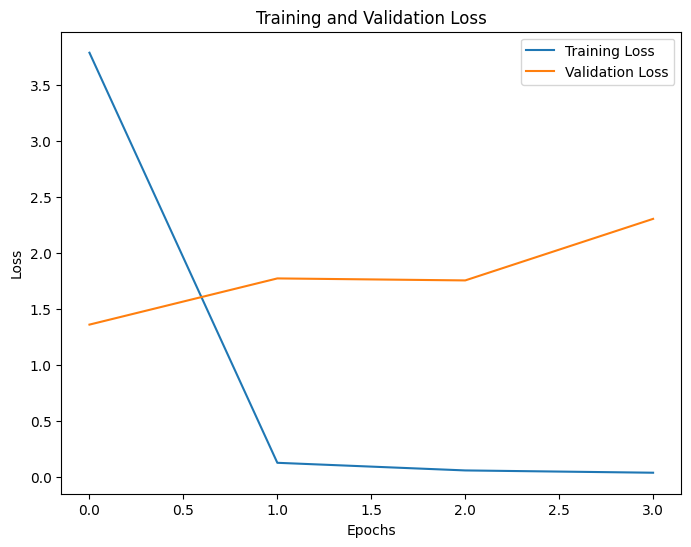

In [ ]:
import matplotlib.pyplot as plt
train_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.figure(figsize=(8, 6))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

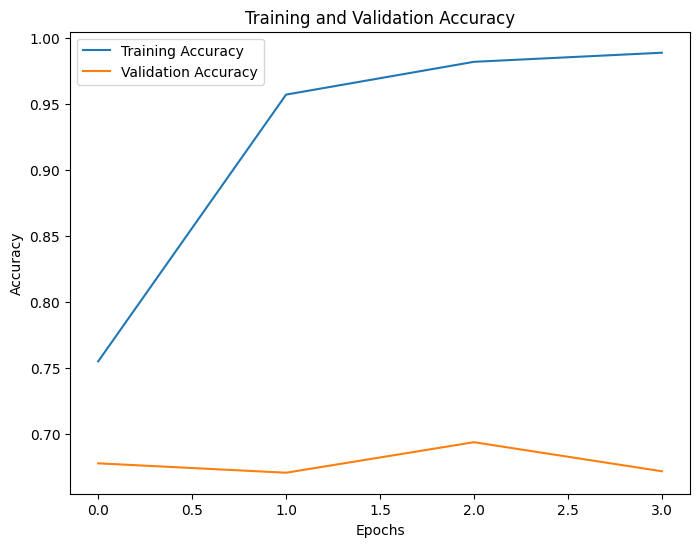

In [ ]:
import matplotlib.pyplot as plt

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure(figsize=(8, 6))
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Test Accuracy: 0.68
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step
Manual Accuracy: 0.68


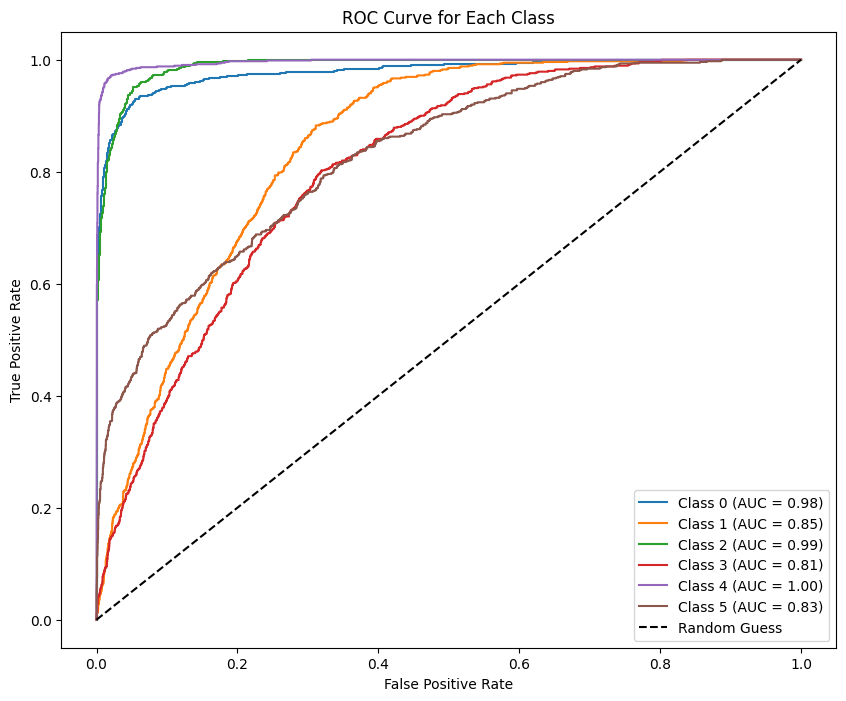

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize


test_loss, test_accuracy = model.evaluate(
    {"cnn_input": X_test, "glcm_input": X_test_glcm},
    y_test_mapped,
    verbose=0
)
print(f"Test Accuracy: {test_accuracy:.2f}")


y_pred_probs = model.predict({"cnn_input": X_test, "glcm_input": X_test_glcm})
y_pred_classes = np.argmax(y_pred_probs, axis=1)

acc = accuracy_score(y_test_mapped, y_pred_classes)
print(f"Manual Accuracy: {acc:.2f}")

y_test_binarized = label_binarize(y_test_mapped, classes=np.arange(len(np.unique(y_test_mapped))))
fpr = {}
tpr = {}
roc_auc = {}
n_classes = y_test_binarized.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Each Class")
plt.legend(loc="lower right")
plt.show()